In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# import statsmodels.formula.api as sm
import re
import sqlite3
from datetime import datetime
from pandas import Series, DataFrame
sns.set()
from sklearn.linear_model import LinearRegression
from IPython.display import display
#import testmodul
%pwd
%matplotlib inline

In [8]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)
pd.set_option('display.max_rows', 50)
pd.set_option('display.max_columns', 200)

In [16]:
data = pd.read_csv('/home/yagor/Рабочий стол/mipt/lab3/data/en.openproductsfacts.org.products.csv', sep='\t', low_memory=False)

In [17]:
print('There are {:,} rows '.format(data.shape[0]) + 'and {} columns in our data'.format(data.shape[1]))

There are 11,668 rows and 168 columns in our data


In [18]:
data.columns

Index(['code', 'url', 'creator', 'created_t', 'created_datetime',
       'last_modified_t', 'last_modified_datetime', 'product_name',
       'generic_name', 'quantity',
       ...
       'carbon-footprint-from-meat-or-fish_100g', 'nutrition-score-fr_100g',
       'nutrition-score-uk_100g', 'glycemic-index_100g', 'water-hardness_100g',
       'choline_100g', 'phylloquinone_100g', 'beta-glucan_100g',
       'inositol_100g', 'carnitine_100g'],
      dtype='object', length=168)

In [19]:
data.describe()

,created_t,last_modified_t,cities,allergens_en,serving_quantity,additives_n,energy-kj_100g,energy-kcal_100g,energy-from-fat_100g,fat_100g,saturated-fat_100g,-butyric-acid_100g,-caproic-acid_100g,-caprylic-acid_100g,-capric-acid_100g,-lauric-acid_100g,-myristic-acid_100g,-palmitic-acid_100g,-stearic-acid_100g,-arachidic-acid_100g,-behenic-acid_100g,-lignoceric-acid_100g,-cerotic-acid_100g,-montanic-acid_100g,-melissic-acid_100g,monounsaturated-fat_100g,polyunsaturated-fat_100g,omega-3-fat_100g,-alpha-linolenic-acid_100g,-eicosapentaenoic-acid_100g,-docosahexaenoic-acid_100g,omega-6-fat_100g,-linoleic-acid_100g,-arachidonic-acid_100g,-gamma-linolenic-acid_100g,-dihomo-gamma-linolenic-acid_100g,omega-9-fat_100g,-oleic-acid_100g,-elaidic-acid_100g,-gondoic-acid_100g,-mead-acid_100g,-erucic-acid_100g,-nervonic-acid_100g,trans-fat_100g,cholesterol_100g,carbohydrates_100g,sugars_100g,-sucrose_100g,-glucose_100g,-fructose_100g,-lactose_100g,-maltose_100g,-maltodextrins_100g,starch_100g,polyols_100g,fiber_100g,-soluble-fiber_100g,-insoluble-fiber_100g,proteins_100g,casein_100g,serum-proteins_100g,nucleotides_100g,salt_100g,sodium_100g,alcohol_100g,vitamin-a_100g,beta-carotene_100g,vitamin-d_100g,vitamin-e_100g,vitamin-k_100g,vitamin-c_100g,vitamin-b1_100g,vitamin-b2_100g,vitamin-pp_100g,vitamin-b6_100g,vitamin-b9_100g,folates_100g,vitamin-b12_100g,biotin_100g,pantothenic-acid_100g,silica_100g,bicarbonate_100g,potassium_100g,chloride_100g,calcium_100g,phosphorus_100g,iron_100g,magnesium_100g,zinc_100g,copper_100g,manganese_100g,fluoride_100g,selenium_100g,chromium_100g,molybdenum_100g,iodine_100g,caffeine_100g,taurine_100g,ph_100g,fruits-vegetables-nuts_100g,fruits-vegetables-nuts-dried_100g,fruits-vegetables-nuts-estimate_100g,collagen-meat-protein-ratio_100g,cocoa_100g,chlorophyl_100g,carbon-footprint_100g,carbon-footprint-from-meat-or-fish_100g,nutrition-score-fr_100g,nutrition-score-uk_100g,glycemic-index_100g,water-hardness_100g,choline_100g,phylloquinone_100g,beta-glucan_100g,inositol_100g,carnitine_100g
count,11668.000,11668.000,0.000,0.000,2341.000,1663.000,37.000,1464.000,0.000,2191.000,2251.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,2.000,2.000,1.000,0.000,3.000,3.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,4.000,4.000,2191.000,2249.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,398.000,0.000,0.000,2203.000,0.000,0.000,0.000,2049.000,2049.000,65.000,6.000,0.000,3.000,1.000,0.000,9.000,3.000,3.000,4.000,4.000,1.000,2.000,5.000,2.000,2.000,0.000,1.000,3.000,0.000,6.000,3.000,9.000,2.000,4.000,1.000,1.000,0.000,1.000,0.000,0.000,2.000,1.000,0.000,0.000,7.000,0.000,0.000,0.000,0.000,0.000,4.000,0.000,198.000,100.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
mean,1581849612.963,1598113783.353,NaN,NaN,42716787697565138944.000,0.842,1187.973,490.770,NaN,938.070,1099.742,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16.100,18.200,55.000,NaN,16.467,11.000,NaN,3.900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000,0.000,295227952735990927327232.000,10326071452.773,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20036328534868795392.000,NaN,NaN,18.358,NaN,NaN,NaN,42731521066672.664,16823433490816.129,22.808,0.000,NaN,0.338,0.019,NaN,23.474,0.834,0.473,0.051,0.479,0.000,0.000,0.001,14.000,0.033,NaN,100.000,0.389,NaN,0.250,0.257,0.008,50000.046,14.257,0.002,0.001,NaN,0.000,NaN,NaN,0.000,33.300,NaN,NaN,52.620,NaN,NaN,NaN,NaN,NaN,0.000,NaN,10.732,9.360,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,45307350.950,43877149.980,NaN,NaN,2066803998872780931072.000,1.869,933.127,948.066,NaN,30210.819,51709.472,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,21.072,18.102,NaN,NaN,2.656,1.732,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000,0.000,13819065130174950861176832.000,489699717018.941,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,399723498859604934656.000,NaN,NaN,296.692,NaN,NaN,NaN,1934279955714792.500,761527541620001.625,39.982,0.001,NaN,0.573,NaN,NaN,40.542,0.721,0.408,0.073,0.947,N

In [20]:
data.set_index('code', inplace=True)

In [21]:
print("This data is really messy! \nthe 'countries_en' column contians {} \"unique\" countries ".format(data['countries_en'].dropna().unique().shape[0]))

This data is really messy! 
the 'countries_en' column contians 284 "unique" countries 


In [22]:
data = data.drop(columns=['creator',
                          'brands',
                          'brands_tags',
                          'categories',
                          'main_category',
                          'countries',
                          'countries_tags',
                          'additives',
                          'additives_tags',
                          'categories_tags',
                          'states',
                          'states_en',
                          'states_tags',
                          'url',
                          'quantity',
                          'packaging_tags',
                          'packaging',
                          'created_t',
                          'last_modified_t',
                         
                          
                          
                          
                          'image_url',
                          'image_small_url',
                         ])

In [23]:
print('There are {:,} rows '.format(data.shape[0]) + 'and {} columns left in our data'.format(data.shape[1]))

There are 11,668 rows and 146 columns left in our data


In [24]:
print(data.isnull().sum().sort_values())

created_datetime                         0
last_modified_datetime                   0
countries_en                           204
product_name                          2580
categories_en                         7357
                                     ...  
-gondoic-acid_100g                   11668
-elaidic-acid_100g                   11668
-oleic-acid_100g                     11668
-dihomo-gamma-linolenic-acid_100g    11668
carnitine_100g                       11668
Length: 146, dtype: int64


In [26]:
col_vides=[]
for col in data.columns:
    if data[col].isnull().all():
        col_vides.append(col)
#print (df.sample(5).to_html())
print ('empty columns are :\n\n')
display(col_vides)
t=pd.DataFrame(index=['number of missing values', 'number of values','fill_rate'], columns=data.columns )
for col in data.columns:
    nb_nan=data[col].isnull().sum()
    t.loc['number of missing values',col]=nb_nan              
    t.loc['number of values', col]= data.shape[0]-nb_nan 
    t.loc['fill_rate', col]=(data.shape[0]-nb_nan)/(data.shape[0]*1.0)
display(t)#pd.set
#t.to_pickle('./tableuxValeursManquantes.pkl')
print(data.shape[0]*0.3/100)
#t[t[col]>df.shape[0]*0.2/100]

"""Selection criterion"""
p=0.95 #0.05
for col in t.columns:
    if t.loc['number of missing values',col]>(data.shape[0]*(100-p)/100):
    #if f=t[t[col]>d.shape[0]*0.2/100]
        #display(t[col])
        print('{} deleted -------> only {} values.'.format(col, data.shape[0]-t.loc['number of missing values', col]))
        data=data.drop(col, axis=1)
display(data.shape) 

empty columns are :




['cities',
 'allergens_en',
 'energy-from-fat_100g',
 '-butyric-acid_100g',
 '-caproic-acid_100g',
 '-caprylic-acid_100g',
 '-capric-acid_100g',
 '-lauric-acid_100g',
 '-myristic-acid_100g',
 '-palmitic-acid_100g',
 '-stearic-acid_100g',
 '-arachidic-acid_100g',
 '-behenic-acid_100g',
 '-lignoceric-acid_100g',
 '-cerotic-acid_100g',
 '-montanic-acid_100g',
 '-melissic-acid_100g',
 '-alpha-linolenic-acid_100g',
 'omega-6-fat_100g',
 '-arachidonic-acid_100g',
 '-gamma-linolenic-acid_100g',
 '-dihomo-gamma-linolenic-acid_100g',
 'omega-9-fat_100g',
 '-oleic-acid_100g',
 '-elaidic-acid_100g',
 '-gondoic-acid_100g',
 '-mead-acid_100g',
 '-erucic-acid_100g',
 '-nervonic-acid_100g',
 '-sucrose_100g',
 '-glucose_100g',
 '-fructose_100g',
 '-lactose_100g',
 '-maltose_100g',
 '-maltodextrins_100g',
 'starch_100g',
 'polyols_100g',
 '-soluble-fiber_100g',
 '-insoluble-fiber_100g',
 'casein_100g',
 'serum-proteins_100g',
 'nucleotides_100g',
 'beta-carotene_100g',
 'vitamin-k_100g',
 'silica_100g'

,created_datetime,last_modified_datetime,product_name,generic_name,categories_en,origins,origins_tags,manufacturing_places,manufacturing_places_tags,labels,labels_tags,labels_en,emb_codes,emb_codes_tags,first_packaging_code_geo,cities,cities_tags,purchase_places,stores,countries_en,ingredients_text,allergens,allergens_en,traces,traces_tags,traces_en,serving_size,serving_quantity,additives_n,additives_en,main_category_en,image_ingredients_url,image_ingredients_small_url,image_nutrition_url,image_nutrition_small_url,energy-kj_100g,energy-kcal_100g,energy_100g,energy-from-fat_100g,fat_100g,saturated-fat_100g,-butyric-acid_100g,-caproic-acid_100g,-caprylic-acid_100g,-capric-acid_100g,-lauric-acid_100g,-myristic-acid_100g,-palmitic-acid_100g,-stearic-acid_100g,-arachidic-acid_100g,-behenic-acid_100g,-lignoceric-acid_100g,-cerotic-acid_100g,-montanic-acid_100g,-melissic-acid_100g,monounsaturated-fat_100g,polyunsaturated-fat_100g,omega-3-fat_100g,-alpha-linolenic-acid_100g,-eicosapentaenoic-acid_100g,-docosahexaenoic-acid_100g,omega-6-fat_100g,-linoleic-acid_100g,-arachidonic-acid_100g,-gamma-linolenic-acid_100g,-dihomo-gamma-linolenic-acid_100g,omega-9-fat_100g,-oleic-acid_100g,-elaidic-acid_100g,-gondoic-acid_100g,-mead-acid_100g,-erucic-acid_100g,-nervonic-acid_100g,trans-fat_100g,cholesterol_100g,carbohydrates_100g,sugars_100g,-sucrose_100g,-glucose_100g,-fructose_100g,-lactose_100g,-maltose_100g,-maltodextrins_100g,starch_100g,polyols_100g,fiber_100g,-soluble-fiber_100g,-insoluble-fiber_100g,proteins_100g,casein_100g,serum-proteins_100g,nucleotides_100g,salt_100g,sodium_100g,alcohol_100g,vitamin-a_100g,beta-carotene_100g,vitamin-d_100g,vitamin-e_100g,vitamin-k_100g,vitamin-c_100g,vitamin-b1_100g,vitamin-b2_100g,vitamin-pp_100g,vitamin-b6_100g,vitamin-b9_100g,folates_100g,vitamin-b12_100g,biotin_100g,pantothenic-acid_100g,silica_100g,bicarbonate_100g,potassium_100g,chloride_100g,calcium_100g,phosphorus_100g,iron_100g,magnesium_100g,zinc_100g,copper_100g,manganese_100g,fluoride_100g,selenium_100g,chromium_100g,molybdenum_100g,iodine_100g,caffeine_100g,taurine_100g,ph_100g,fruits-vegetables-nuts_100g,fruits-vegetables-nuts-dried_100g,fruits-vegetables-nuts-estimate_100g,collagen-meat-protein-ratio_100g,cocoa_100g,chlorophyl_100g,carbon-footprint_100g,carbon-footprint-from-meat-or-fish_100g,nutrition-score-fr_100g,nutrition-score-uk_100g,glycemic-index_100g,water-hardness_100g,choline_100g,phylloquinone_100g,beta-glucan_100g,inositol_100g,carnitine_100g
number of missing values,0,0,2580,11060,7357,11270,11276,10701,10707,10564,10565,10565,11411,11414,11620,11668,11615,10144,10299,204,10005,11596,11668,11416,11407,11407,11461,9327,10005,11211,7357,8338,8338,10380,10380,11631,10204,9376,11668,9477,9417,11668,11668,11668,11668,11668,11668,11668,11668,11668,11668,11668,11668,11668,11668,11666,11666,11667,11668,11665,11665,11668,11667,11668,11668,11668,11668,11668,11668,11668,11668,11668,11668,11664,11664,9477,9419,11668,11668,11668,11668,11668,11668,11668,11668,11270,11668,11668,9465,11668,11668,11668,9619,9619,11603,11662,11668,11665,11667,11668,11659,11665,11665,11664,11664,11667,11666,11663,11666,11666,11668,11667,11665,11668,11662,11665,11659,11666,11664,11667,11667,11668,11667,11668,11668,11666,11667,11668,11668,11661,11668,11668,11668,11668,11668,11664,11668,11470,11568,11668,11668,11668,11668,11668,11668,11668
number of values,11668,11668,9088,608,4311,398,392,967,961,1104,1103,1103,257,254,48,0,53,1524,1369,11464,1663,72,0,252,261,261,207,2341,1663,457,4311,3330,3330,1288,1288,37,1464,2292,0,2191,2251,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2,1,0,3,3,0,1,0,0,0,0,0,0,0,0,0,0,4,4,2191,2249,0,0,0,0,0,0,0,0,398,0,0,2203,0,0,0,2049,2049,65,6,0,3,1,0,9,3,3,4,4,1,2,5,2,2,0,1,3,0,6,3,9,2,4,1,1,0,1,0,0,2,1,0,0,7,0,0,0,0,0,4,0,198,100,0,0,0,0,0,0,0
fill_rate,1.000,1.000,0.779,0.052,0.369,0.034,0.034,0.083,0.082,0.095,0.095,0.095,0.022,0.022,0.004,0.000,0.005,0.131,0.117,0.983,0.143,0.006,0.000,0.022,0.022,0.022,0.018,0.201,0.143,0.039,0.369,0.285,0

35.004
first_packaging_code_geo deleted -------> only 48 values.
cities deleted -------> only 0 values.
cities_tags deleted -------> only 53 values.
allergens deleted -------> only 72 values.
allergens_en deleted -------> only 0 values.
energy-kj_100g deleted -------> only 37 values.
energy-from-fat_100g deleted -------> only 0 values.
-butyric-acid_100g deleted -------> only 0 values.
-caproic-acid_100g deleted -------> only 0 values.
-caprylic-acid_100g deleted -------> only 0 values.
-capric-acid_100g deleted -------> only 0 values.
-lauric-acid_100g deleted -------> only 0 values.
-myristic-acid_100g deleted -------> only 0 values.
-palmitic-acid_100g deleted -------> only 0 values.
-stearic-acid_100g deleted -------> only 0 values.
-arachidic-acid_100g deleted -------> only 0 values.
-behenic-acid_100g deleted -------> only 0 values.
-lignoceric-acid_100g deleted -------> only 0 values.
-cerotic-acid_100g deleted -------> only 0 values.
-montanic-acid_100g deleted -------> only 0 

(11668, 41)

In [28]:
print(data.isnull().sum().sort_values())

created_datetime                   0
last_modified_datetime             0
countries_en                     204
product_name                    2580
categories_en                   7357
main_category_en                7357
image_ingredients_url           8338
image_ingredients_small_url     8338
serving_quantity                9327
energy_100g                     9376
saturated-fat_100g              9417
sugars_100g                     9419
proteins_100g                   9465
fat_100g                        9477
carbohydrates_100g              9477
salt_100g                       9619
sodium_100g                     9619
additives_n                    10005
ingredients_text               10005
purchase_places                10144
energy-kcal_100g               10204
stores                         10299
image_nutrition_small_url      10380
image_nutrition_url            10380
labels                         10564
labels_tags                    10565
labels_en                      10565
m

In [ ]:
data.labels_en.unique()

In [45]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer

# clustering algorithms
from sklearn.cluster import KMeans
from sklearn.metrics import davies_bouldin_score, calinski_harabasz_score

In [46]:
data = pd.read_csv('/home/yagor/Рабочий стол/mipt/lab3/data/en.openproductsfacts.org.products.csv', sep='\t')

/tmp/ipykernel_8894/479652553.py:1: DtypeWarning: Columns (59) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('/home/yagor/Рабочий стол/mipt/lab3/data/en.openproductsfacts.org.products.csv', sep='\t')


In [47]:
rows_to_delete = []
for i, name in enumerate(data['product_name']):
    if pd.isnull(name) or name.isdigit():
        rows_to_delete.append(i)
data.drop(rows_to_delete, inplace=True)

data.set_index('product_name', inplace=True) # make the index be the food names

In [48]:
# minimizing the number of features we are dealing with in a convinient way:
# get rid of categorical data
data = data.select_dtypes('float64')

for i in data:
    if data[i].isnull().sum() > data.shape[0]*(4/5): # get rid of features which are less than 4/5 filled
        data.drop([i], axis=1, inplace=True)
    elif math.isnan(data[i].mean()):   # get rid of data with no mean
        data.drop([i], axis=1, inplace=True)

data.describe()

,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,proteins_100g,salt_100g,sodium_100g
count,2158.000,2220.000,2157.000,2214.000,2170.000,2016.000,2016.000
mean,24.693,1113.065,299881522691032039292928.000,10489311060.789,9.394,43430995369835.125,17098817074738.289
std,579.486,52069.275,13927551721112566031712256.000,493555246130.531,32.460,1950046855685421.000,767734982553314.000
min,0.000,0.000,0.000,0.000,0.000,0.000,0.000
25%,0.000,0.000,0.000,0.000,0.000,0.000,0.000
50%,2.000,1.000,5.000,1.000,2.000,1.000,0.394
75%,12.000,5.000,23.000,7.650,9.000,3.000,1.200
max,26895.000,2453345.000,646844444444556102312394752.000,23223334667888.000,1100.000,87556886665567648.000,34471215222664428.000


In [49]:
# impute the data
my_imputer = SimpleImputer()
updated_data = pd.DataFrame(data = my_imputer.fit_transform(data), index=data.index)

updated_data = (updated_data - np.mean(updated_data)) /(updated_data.max() - updated_data.min())

updated_data.describe()

/home/yagor/anaconda3/envs/ml/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


,0,1,2,3,4,5,6
count,9087.000,9087.000,9087.000,9087.000,9087.000,9087.000,9087.000
mean,0.000,0.000,0.000,-0.000,0.000,0.000,0.000
std,0.010,0.010,0.010,0.010,0.014,0.010,0.010
min,-0.001,-0.000,-0.000,-0.000,-0.009,-0.000,-0.000
25%,0.000,0.000,0.000,-0.000,0.000,0.000,0.000
50%,0.000,0.000,0.000,-0.000,0.000,0.000,0.000
75%,0.000,0.000,0.000,-0.000,0.000,0.000,0.000
max,0.999,1.000,1.000,1.000,0.991,1.000,1.000


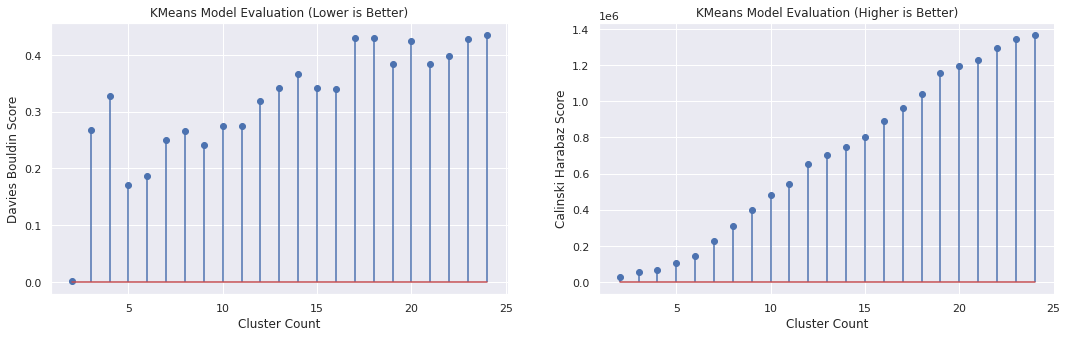

In [51]:
cluster_count_candidates = np.arange(2, 25)

db_score_list = []
ch_score_list = []
for count in cluster_count_candidates:
    clustering_model = KMeans(n_clusters=count).fit(updated_data)
    db_score_list.append(davies_bouldin_score(updated_data, clustering_model.labels_))
    ch_score_list.append(calinski_harabasz_score(updated_data, clustering_model.labels_))

plt.figure(figsize=(18, 5))

plt.subplot(1,2,1)
plt.stem(cluster_count_candidates, db_score_list)
plt.xlabel('Cluster Count')
plt.ylabel('Davies Bouldin Score')
plt.title('KMeans Model Evaluation (Lower is Better)')

plt.subplot(1,2,2)
plt.stem(cluster_count_candidates, ch_score_list)
plt.xlabel('Cluster Count')
plt.ylabel('Calinski Harabaz Score')
plt.title('KMeans Model Evaluation (Higher is Better)')

plt.show()

In [52]:
cluster_count = 16
k_means_model = KMeans(n_clusters=cluster_count)
clustered_data = k_means_model.fit_predict(updated_data)

# seperate the foods indo cluster lists
clusters = [[] for _ in range(cluster_count)]
for i, cluster in enumerate(clustered_data):
    clusters[cluster].append(data.index[i])
    
# Pad all clusters with 0s to equal the length of the maximum cluser,
# so that we can arrange them all into one dataframe.
max_count = 0
for cluster in clusters:
    if len(cluster) > max_count:
        max_count= len(cluster)

for i in range(cluster_count):
    clusters[i] += [0]*(max_count - len(clusters[i]))\
    
# upload results to output file
results = pd.DataFrame({'Cluster '+str(i+1): clusters[i] for i in range(cluster_count)})
results.to_csv('KMeans_results.csv')
print('Full results can be seen in the output file of this kernel.')
results.head(20)

Full results can be seen in the output file of this kernel.


,Cluster 1,Cluster 2,Cluster 3,Cluster 4,Cluster 5,Cluster 6,Cluster 7,Cluster 8,Cluster 9,Cluster 10,Cluster 11,Cluster 12,Cluster 13,Cluster 14,Cluster 15,Cluster 16
0,Omega 3-6-9,légendaire,carte voyageur,ľ autre,Omega 3,Flintstone Gummies,Yummy batteries,Tee chirt,la prophetie des grenouilles,ＮＥＷ Super Mario Bros. U Deluxe,Fish oil,Jeu Nintendo 3DS - Animal Crossing : New Leaf,Jeu Nintendo 3DS - Pokémon Soleil,Filtre en Sticks,la dame en noir,MCT Oil
1,Detective Pikachu,0,Cahier tres bon,ľ autre,0,Swedish bitters,Gas lighter refill,Zoom,0,Animal Crossing,WII Music,Bigflo & Oli - La Vraie Vie,Luffy,Wd-40,0,Omega 3 fish oil
2,Kids united,0,Dépoussièreur,0,0,Melation,56 saveurs,Enveloppe,0,Super Mario party SWITCH 3+,Jeu Nintendo Wii - New Super Mario Bros,Airborne Kids,protection pour volant,Yankee,0,Wild alaskan salmonoil complete omega
3,Civilisation - ORELSAN,0,Dépoussiéreurs,0,0,melatonin,Pâte polymère,54 Cartes Ducale Rouge,0,Stylo à Bille Bic 4 Couleurs Pointe Fine,Jeu Nintendo 3DS - Poochy & Yoshi's Woolly World,Multivitamine,protection pour volant,Malboro Red,0,Magnesium
4,Airborne,0,Suspend,0,0,elderberry gummies,Pâte polymère,Litière végétale haute absorption U NATURE 10L,0,Apple - MQ 8 L 2 ZD / a,Criterium,Cacatus de chez émilie,E liquide,La petite Fadette,0,Magnesium
5,Alien bonbon,0,Spartan tape,0,0,Vitamin c gummies,test,😎 Qui Prend,0,Tichet casino,Tipp-ex Roller Correcteur 'Ecolutions Easy Ref...,Ma carte plaisir!,Agenda,L'Équation du nénuphar,0,Triple Omega
6,Pack De 10 Cartouches Azote Pour Siphon à Crèm...,0,Équerre,0,0,Zinc gummies,Sexy green,Balle de baskette mini,0,Taylor Swift - 1989,BRINK,Agenda,"Rhodia Bloc Agrafé No. 20, Format A4+, Quadril...",L'Équation du nénuphar,0,Omega 3 950mg
7,Crew,0,USB C Hub 8 in 1,0,0,Sambucus elderberry,Chesterfield,"Lyreco Whiteboard Marker, Sort",0,Taylor Swift Reputation CD,Livre de Musso,Bic cuivre,Aiguille a tricoter,Guerre des clans,0,Zero Fat (Conjugated Linoleic Acid)
8,Apple - Iphone 6S Gris Sidéral - 16 Go (MKQJ 2...,0,Peluche,0,0,Sambucus reflief,raid,Plante verte,0,Taylor Swift Reputation CD,ABBA,Feutre ardoise,"Bic Marqueur Permanent Marking Onyx 1481, Poin...",Légendaire,0,Fish Oil
9,Apple - Iphone 6S Gris Sidéral - 16 Go (MKQJ 2...,0,mi band 3,0,0,Fiber powder,Champa,Gout a chicha,0,Carte cantine,NRJ 12 Best of 2017,Cahier Polypropylène 24X32 CM Séyès Rouge,Cartatoto Multiplications - Jeu De Carte,One piece tome 18,0,MegaKrill supplement


## new

In [24]:

original = pd.read_csv("/home/yagor/Рабочий стол/mipt/lab3/data/en.openfoodfacts.org.products.tsv",delimiter='\t', encoding='utf-8', nrows = 50000)
original.head()

/tmp/ipykernel_3983/2851077523.py:1: DtypeWarning: Columns (8,9,10,11,17,18,19,20,21,22,23,24,25,26,28,29,30,35,37,38,39,48,61,62) have mixed types. Specify dtype option on import or set low_memory=False.
  original = pd.read_csv("/home/yagor/Рабочий стол/mipt/lab3/data/en.openfoodfacts.org.products.tsv",delimiter='\t', encoding='utf-8', nrows = 50000)


,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,generic_name,quantity,...,fruits-vegetables-nuts_100g,fruits-vegetables-nuts-estimate_100g,collagen-meat-protein-ratio_100g,cocoa_100g,chlorophyl_100g,carbon-footprint_100g,nutrition-score-fr_100g,nutrition-score-uk_100g,glycemic-index_100g,water-hardness_100g
0,3087,http://world-en.openfoodfacts.org/product/0000...,openfoodfacts-contributors,1474103866,2016-09-17T09:17:46Z,1474103893,2016-09-17T09:18:13Z,Farine de blé noir,NaN,1kg,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,4530,http://world-en.openfoodfacts.org/product/0000...,usda-ndb-import,1489069957,2017-03-09T14:32:37Z,1489069957,2017-03-09T14:32:37Z,Banana Chips Sweetened (Whole),NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,14.0,14.0,NaN,NaN
2,4559,http://world-en.openfoodfacts.org/product/0000...,usda-ndb-import,1489069957,2017-03-09T14:32:37Z,1489069957,2017-03-09T14:32:37Z,Peanuts,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN
3,16087,http://world-en.openfoodfacts.org/product/0000...,usda-ndb-import,1489055731,2017-03-09T10:35:31Z,1489055731,2017-03-09T10:35:31Z,Organic Salted Nut Mix,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,12.0,NaN,NaN
4,16094,http://world-en.openfoodfacts.org/product/0000...,usda-ndb-import,1489055653,2017-03-09T10:34:13Z,1489055653,2017-03-09T10:34:13Z,Organic Polenta,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


/tmp/ipykernel_3983/1448301403.py:5: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  sns.distplot(nan_values, kde=False, bins=np.int(original.shape[0]/100), color = "Red")
/home/yagor/anaconda3/envs/ml/lib/python3.10/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Missing values by feature')

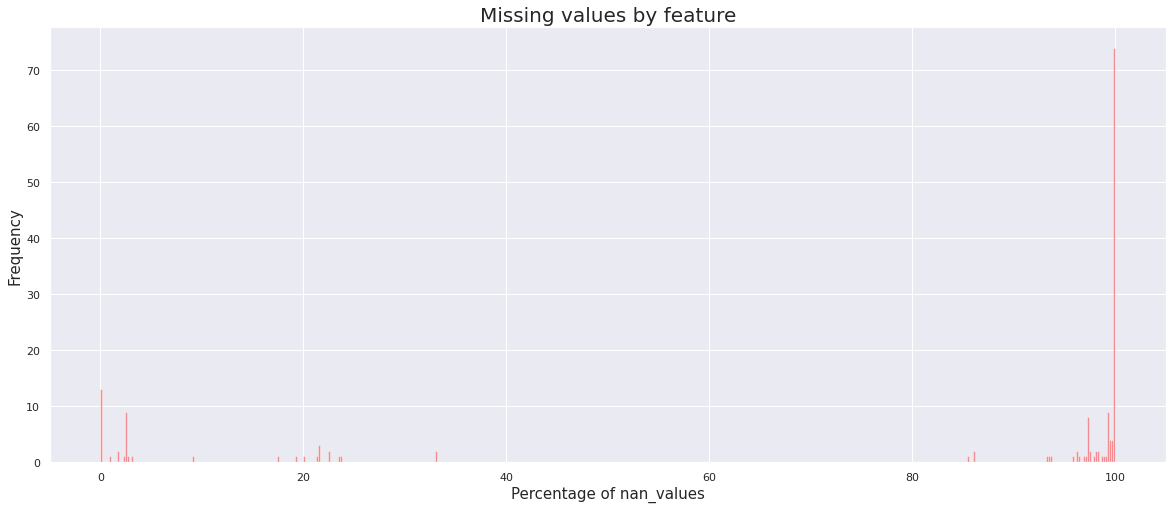

In [25]:
nan_values = original.isnull().sum()
nan_values = nan_values / original.shape[0] *100

plt.figure(figsize=(20,8))
sns.distplot(nan_values, kde=False, bins=np.int(original.shape[0]/100), color = "Red")
plt.xlabel("Percentage of nan_values", size = 15)
plt.ylabel("Frequency", size = 15)
plt.title("Missing values by feature", size = 20)

In [26]:
def split_data_by_nan(cutoff):
    cols_of_interest = nan_values[nan_values <= cutoff].index
    data = original[cols_of_interest]
    return data.copy()

low_nan_data = split_data_by_nan(10)

print("Original number of features: " + str(original.shape[1]))
print("Number of features with less than 10 % nans: " + str(low_nan_data.shape[1]))

Original number of features: 163
Number of features with less than 10 % nans: 29


In [27]:
low_nan_data.columns

Index(['code', 'url', 'creator', 'created_t', 'created_datetime',
       'last_modified_t', 'last_modified_datetime', 'product_name', 'brands',
       'brands_tags', 'countries', 'countries_tags', 'countries_en',
       'ingredients_text', 'serving_size', 'additives_n', 'additives',
       'ingredients_from_palm_oil_n',
       'ingredients_that_may_be_from_palm_oil_n', 'states', 'states_tags',
       'states_en', 'energy_100g', 'fat_100g', 'carbohydrates_100g',
       'sugars_100g', 'proteins_100g', 'salt_100g', 'sodium_100g'],
      dtype='object')

In [28]:
col = low_nan_data.columns

In [29]:
set(col) ^ set(nutrition_table_cols)

{'additives',
 'additives_n',
 'brands',
 'brands_tags',
 'code',
 'countries',
 'countries_en',
 'countries_tags',
 'created_datetime',
 'created_t',
 'creator',
 'ingredients_from_palm_oil_n',
 'ingredients_text',
 'ingredients_that_may_be_from_palm_oil_n',
 'last_modified_datetime',
 'last_modified_t',
 'product_name',
 'serving_size',
 'sodium_100g',
 'states',
 'states_en',
 'states_tags',
 'url'}

In [31]:

nutrition_table_cols = ['fat_100g', 'carbohydrates_100g', 'sugars_100g', 'proteins_100g', 'salt_100g', 'energy_100g']
nutrition_table = low_nan_data[nutrition_table_cols].copy()

In [32]:
nutrition_table["isempty"] = np.where(nutrition_table.isnull().sum(axis=1) >= 1, 1, 0)
percentage = nutrition_table.isempty.value_counts()[1] / nutrition_table.shape[0] * 100
print("Percentage of incomplete tables: " + str(percentage))

Percentage of incomplete tables: 9.944


In [33]:
nutrition_table = nutrition_table[nutrition_table.isempty==0].copy()
nutrition_table.isnull().sum()

fat_100g              0
carbohydrates_100g    0
sugars_100g           0
proteins_100g         0
salt_100g             0
energy_100g           0
isempty               0
dtype: int64

In [34]:
nutrition_table.drop("isempty", inplace=True,axis=1)

In [35]:
nutrition_table["reconstructed_energy"] = nutrition_table["fat_100g"] * 39 + nutrition_table["carbohydrates_100g"] * 17 + nutrition_table["proteins_100g"] * 17

nutrition_table.head()

,fat_100g,carbohydrates_100g,sugars_100g,proteins_100g,salt_100g,energy_100g,reconstructed_energy
1,28.57,64.29,14.29,3.57,0.00000,2243.0,2267.85
2,17.86,60.71,17.86,17.86,0.63500,1941.0,2032.23
3,57.14,17.86,3.57,17.86,1.22428,2540.0,2835.70
7,18.75,57.81,15.62,14.06,0.13970,1833.0,1953.04
12,36.67,36.67,3.33,16.67,1.60782,2230.0,2336.91


Text(0, 0.5, 'reconstructed energy')

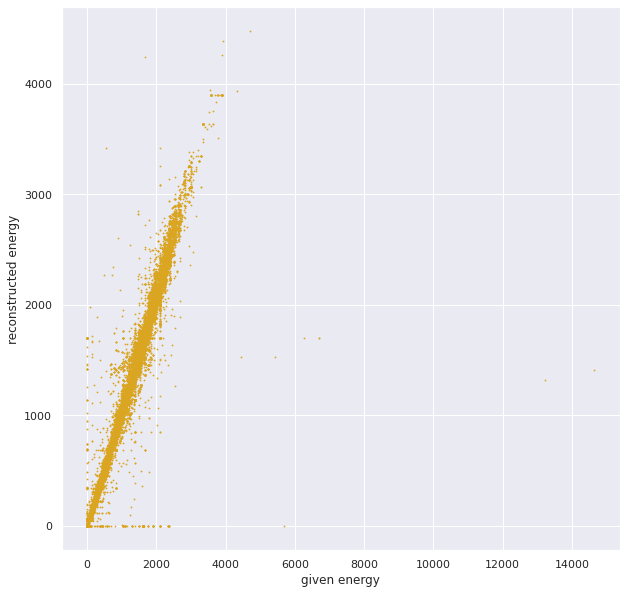

In [36]:
plt.figure(figsize = (10,10))
plt.scatter(nutrition_table["energy_100g"], nutrition_table["reconstructed_energy"], s = 0.6, c= "goldenrod")
plt.xlabel("given energy")
plt.ylabel("reconstructed energy")

In [37]:
nutrition_table["g_sum"] = nutrition_table.fat_100g + nutrition_table.carbohydrates_100g + nutrition_table.proteins_100g

nutrition_table["exceeded"] = np.where(nutrition_table.g_sum.values > 100, 1, 0)

In [38]:
nutrition_table[nutrition_table["exceeded"] == 1].head()

,fat_100g,carbohydrates_100g,sugars_100g,proteins_100g,salt_100g,energy_100g,reconstructed_energy,g_sum,exceeded
225,39.29,80.36,46.43,5.36,0.63500,2912.0,2989.55,125.01,1
406,0.00,100.00,60.00,5.00,0.25400,1255.0,1785.00,105.00,1
767,26.67,66.67,26.67,6.67,0.84582,2230.0,2286.91,100.01,1
769,26.67,66.67,26.67,6.67,0.93218,2230.0,2286.91,100.01,1
770,26.70,66.70,33.30,6.67,0.93100,2230.0,2288.59,100.07,1


In [39]:
nutrition_table.exceeded.value_counts() 

0    44634
1      394
Name: exceeded, dtype: int64

In [40]:
nutrition_table["product"] = original.loc[nutrition_table.index.values]["product_name"] 

In [41]:
nutrition_table.to_csv("nutrition_table.csv", header=True, index=True) 

In [42]:
feature = "g_sum"

In [43]:
colors_dict = {"fat_100g": "lightskyblue", "carbohydrates_100g": "limegreen", "sugars_100g": "hotpink", "proteins_100g": "mediumorchid", "energy_100g": "gold", "salt_100g": "gray", "reconstructed_energy": "orange", "g_sum": "m"}

/home/yagor/anaconda3/envs/ml/lib/python3.10/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, 'frequency')

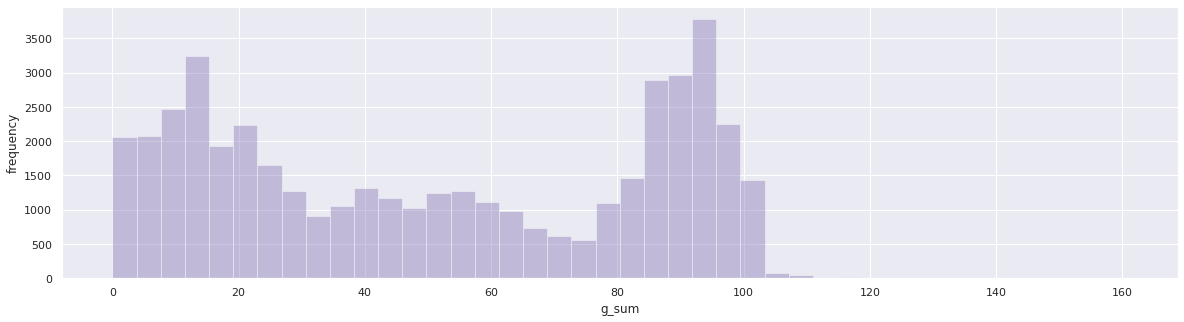

In [44]:
plt.figure(figsize=(20,5))
sns.distplot(nutrition_table[feature], kde = False, color = colors_dict[feature])
plt.xlabel(feature)
plt.ylabel("frequency")

In [45]:
features = ["fat_100g", "carbohydrates_100g", "sugars_100g", "proteins_100g", "salt_100g", "energy_100g", "reconstructed_energy", "g_sum"]

In [47]:
from sklearn.mixture import GaussianMixture
X_train = nutrition_table[features].values

model = GaussianMixture(n_components=14, covariance_type="full", n_init = 5, max_iter = 200)
model.fit(X_train)
log_prob = model.score_samples(X_train)
results = nutrition_table[features].copy()
results["cluster"] = model.predict(X_train)
results["product_name"] = original.loc[nutrition_table.index.values, "product_name"]

probas = np.round(model.predict_proba(X_train), 2)
cluster_values = results.cluster.values
certainty = np.zeros(cluster_values.shape[0])
for n in range(len(certainty)):
    certainty[n] = probas[n,cluster_values[n]]
    
results["certainty"] = certainty

In [55]:
results[results.cluster == 2].head(6886)

,fat_100g,carbohydrates_100g,sugars_100g,proteins_100g,salt_100g,energy_100g,reconstructed_energy,g_sum,cluster,product_name,certainty
72,1.72,60.34,5.17,13.79,2.75844,1297.0,1327.29,75.85,2,10-Grain Pancake Mix,0.45
105,1.43,57.14,8.57,22.86,1.81356,1314.0,1415.77,81.43,2,Split Pea Soup Mix,0.77
144,2.22,71.11,2.22,15.56,0.02794,1674.0,1559.97,88.89,2,Organic Harvest Pilaf,0.99
206,1.18,71.76,4.71,12.94,1.19634,1527.0,1485.92,85.88,2,Sliced Plain Bagel,1.00
448,0.89,71.43,1.79,14.29,0.00000,1494.0,1491.95,86.61,2,Lumaconi Giant Pasta Shells Italian Macaroni P...,1.00
...,...,...,...,...,...,...,...,...,...,...,...
49917,1.43,60.00,2.86,22.86,0.00000,1435.0,1464.39,84.29,2,Navy Beans,1.00
49918,0.00,62.86,2.86,22.86,0.00000,1435.0,1457.24,85.72,2,Great Northern Beans,1.00
49919,0.00,62.86,8.57,20.00,0.00000,1435.0,1408.62,82.86,2,Baby Lima Beans,0.98
49920,0.00,62.86,8.57,22.86,0.03556,1435.0,1457.24,85.72,2,Large Lima Beans,0.99


In [69]:
from sklearn.cluster import KMeans
from sklearn.metrics import davies_bouldin_score, calinski_harabasz_score

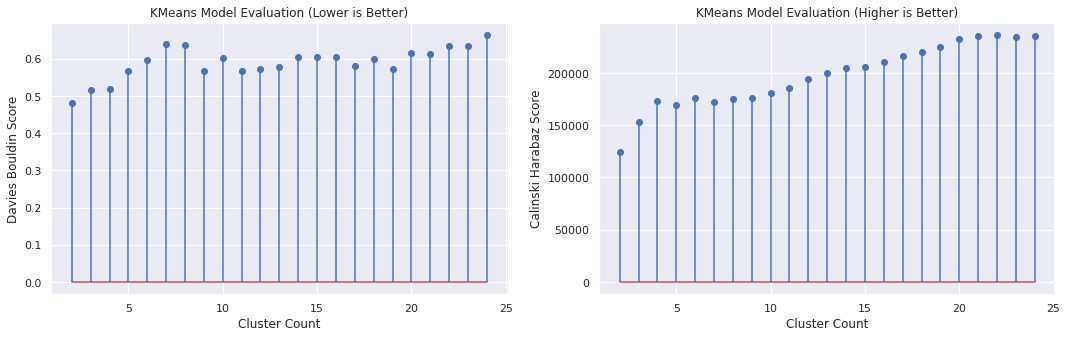

In [72]:
cluster_count_candidates = np.arange(2, 25)

db_score_list = []
ch_score_list = []
for count in cluster_count_candidates:
    clustering_model = KMeans(n_clusters=count).fit(X_train)
    db_score_list.append(davies_bouldin_score(X_train, clustering_model.labels_))
    ch_score_list.append(calinski_harabasz_score(X_train, clustering_model.labels_))

plt.figure(figsize=(18, 5))

plt.subplot(1,2,1)
plt.stem(cluster_count_candidates, db_score_list)
plt.xlabel('Cluster Count')
plt.ylabel('Davies Bouldin Score')
plt.title('KMeans Model Evaluation (Lower is Better)')

plt.subplot(1,2,2)
plt.stem(cluster_count_candidates, ch_score_list)
plt.xlabel('Cluster Count')
plt.ylabel('Calinski Harabaz Score')
plt.title('KMeans Model Evaluation (Higher is Better)')

plt.show()

In [73]:
from sklearn.mixture import GaussianMixture
X_train = nutrition_table[features].values
cluster_count = 19
model = KMeans(n_clusters=cluster_count)
model.fit(X_train)


KMeans(n_clusters=19)

In [74]:
results = nutrition_table[features].copy()
results["cluster"] = model.predict(X_train)
results["product_name"] = original.loc[nutrition_table.index.values, "product_name"]
cluster_values = results.cluster.values
    

In [76]:
results[results.cluster == 2].head(6886)

,fat_100g,carbohydrates_100g,sugars_100g,proteins_100g,salt_100g,energy_100g,reconstructed_energy,g_sum,cluster,product_name
1,28.57,64.29,14.29,3.57,0.00000,2243.0,2267.85,96.43,2,Banana Chips Sweetened (Whole)
12,36.67,36.67,3.33,16.67,1.60782,2230.0,2336.91,90.01,2,Zen Party Mix
23,50.00,23.33,6.67,6.67,1.27000,2372.0,2460.00,80.00,2,Fire Roasted Hatch Green Chile Almonds
28,43.33,30.00,6.67,16.67,1.35382,2372.0,2483.26,90.00,2,Thai Curry Roasted Cashews
29,46.67,23.33,3.33,20.00,2.03200,2230.0,2556.74,90.00,2,Wasabi Tamari Almonds
...,...,...,...,...,...,...,...,...,...,...
49655,38.46,30.77,0.00,15.38,0.07874,2222.0,2284.49,84.61,2,Organic Brown Flax Seeds
49656,32.50,57.50,35.00,2.50,0.00000,2197.0,2287.50,92.50,2,"Organics, Organic Banana Chips"
49657,30.00,57.50,42.50,7.50,0.00000,2197.0,2275.00,95.00,2,"Organics, Organic Thompson Raisins"
49658,46.43,17.86,0.00,25.00,0.04572,2255.0,2539.39,89.29,2,Organic Raw Shelled Pumpkin Seed


In [77]:
cluster_count = 19
k_means_model = KMeans(n_clusters=cluster_count)
clustered_data = k_means_model.fit_predict(X_train)

# seperate the foods indo cluster lists
clusters = [[] for _ in range(cluster_count)]
for i, cluster in enumerate(clustered_data):
    clusters[cluster].append(original.index[i])
    
# Pad all clusters with 0s to equal the length of the maximum cluser,
# so that we can arrange them all into one dataframe.
max_count = 0
for cluster in clusters:
    if len(cluster) > max_count:
        max_count= len(cluster)

for i in range(cluster_count):
    clusters[i] += [0]*(max_count - len(clusters[i]))\
    
# upload results to output file
results = pd.DataFrame({'Cluster '+str(i+1): clusters[i] for i in range(cluster_count)})
results.to_csv('KMeans_results.csv')
print('Full results can be seen in the output file of this kernel.')
results.head(20)

Full results can be seen in the output file of this kernel.


,Cluster 1,Cluster 2,Cluster 3,Cluster 4,Cluster 5,Cluster 6,Cluster 7,Cluster 8,Cluster 9,Cluster 10,Cluster 11,Cluster 12,Cluster 13,Cluster 14,Cluster 15,Cluster 16,Cluster 17,Cluster 18,Cluster 19
0,156,10,2,7,82,1,60,66,295,8,0,31791,101,68,51,844,21,473,2621
1,249,13,6,24,108,3,65,116,367,17,4,42440,157,99,63,846,36,4723,2703
2,271,20,11,31,117,5,97,186,3299,29,9,0,318,158,64,848,94,13927,2929
3,282,25,14,41,127,12,100,248,3826,54,18,0,322,159,72,849,333,31665,3155
4,290,30,15,42,202,19,102,277,5122,62,23,0,323,160,83,850,446,31848,3200
5,353,48,16,43,246,22,104,283,5123,70,26,0,370,161,91,851,447,31854,3201
6,356,49,33,50,250,27,163,292,5124,71,38,0,379,162,103,852,586,0,3345
7,373,53,34,58,284,28,165,319,5125,73,45,0,409,164,109,853,746,0,3384
8,378,67,35,61,294,32,169,326,5671,76,46,0,418,238,110,854,987,0,3463
9,387,69,37,74,383,39,170,327,5797,81,52,0,442,244,112,855,988,0,3995
